## Steps :

1. Import Libraries and load data
2. Handle missing values if present (both)
3. Categorical to numerical (both)
4. Features Engineering / Feature Selecction (both)
5. Split dataset into train and test data
6. Import sklearn and create an object of ml algorithm
7. fit and predict / training and testing (traindf)
8. calculate the accuracy_score
9. calculate the probability (If needed)
10. repeat steps(7-9) for test data (if needed )

## 1. Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [3]:
traindf.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
testdf.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


## 2. Handling Missing values (if any)

Use can use df.isnull() or its alice df.isna()
You can use heatmap to visualize null values 

In [5]:
traindf.isna().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

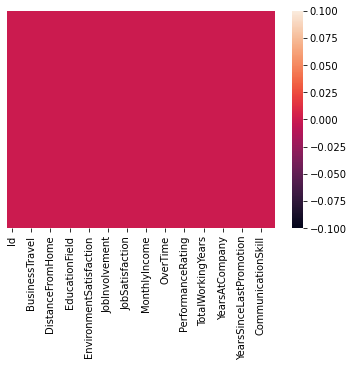

In [6]:
sns.heatmap(testdf.isnull(), yticklabels = False)

There is no null value in train and test data.

## 3. Categorical to numerical

To convert categorical variables to numerical you can use any of the following methods -
1. get_dummies
2. sklearn_preprocessing or labelencoder
3. remove method
4. astype something

#### labelEncoder

In [2]:
from sklearn.preprocessing import LabelEncoder
for column in traindf.columns:
    if traindf[column].dtype == np.number:
        continue
    traindf[column] = LabelEncoder().fit_transform(traindf[column]) 

NameError: name 'traindf' is not defined

#### pd.get_dummies method

In [8]:
'''
for column in testdf.columns :
    if testdf[column].dtype == np.number:
        continue
    testdf[column] = pd.get_dummies(testdf[column]) '''

## 4. Features Engineering / Feature Selecction

#### Drop columns in train dataset

In [9]:
cols = ['Id', 'EmployeeNumber', 'Behaviour']

traindf.drop(traindf[cols], axis = 1, inplace=True)
testdf.drop(testdf[cols], axis = 1, inplace = True)

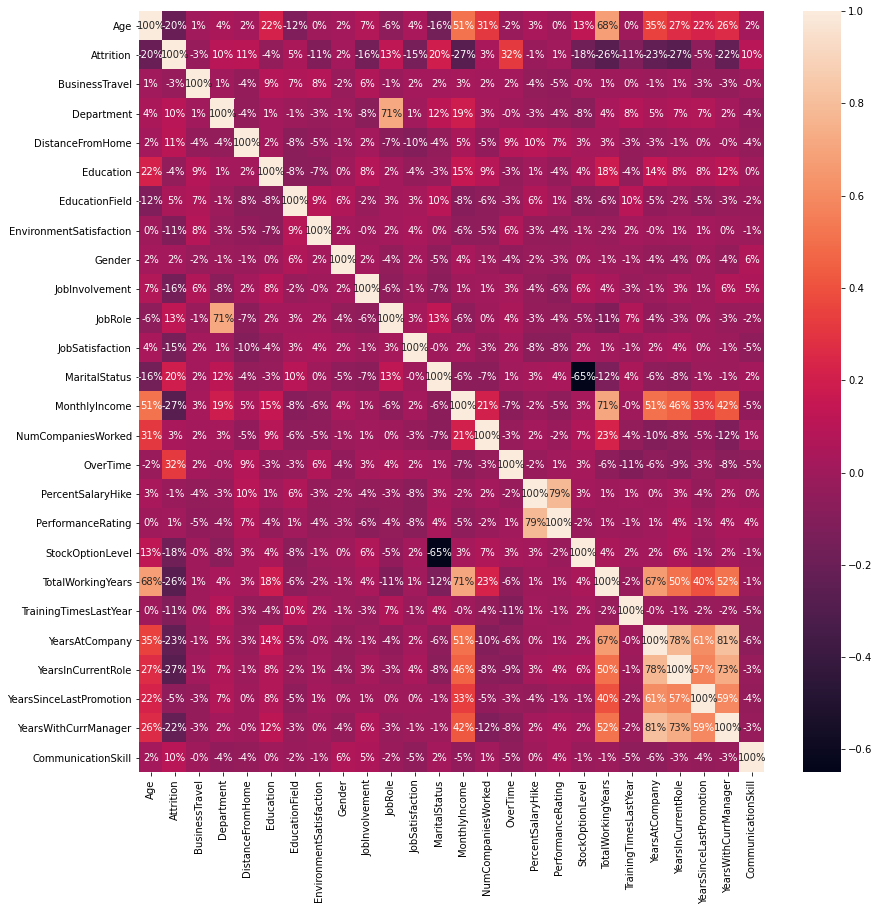

In [10]:
plt.figure(figsize=(14,14))
sns.heatmap(traindf.corr(), annot=True, fmt='.0%')

## 5. Split dataset into train and test data (traindf)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(traindf.drop('Attrition', axis=1),
                                                   traindf['Attrition'], test_size = 0.30)

## 6. Import sklearn and create an object of ml algorithm

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=79)

## 7. fit and predict / training and testing (traindf)

In [13]:
model.fit(X_train, y_train)  #train our model
preds = model.predict(X_test)        #testing our model

## 8. calculate the accuracy_score

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
accuracy

0.9713701431492843

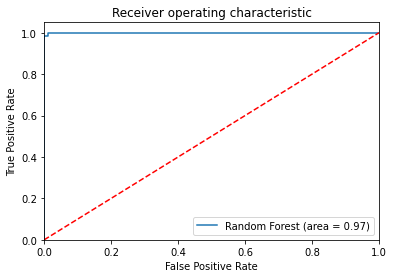

In [21]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## 9. calculate the probability (If needed)

In [16]:
train_prob = model.predict_proba(X_test)[:, 1]
train_prob

array([0.32 , 0.668, 0.348, 0.956, 0.168, 0.192, 0.068, 0.444, 0.972,
       0.988, 0.124, 0.128, 0.096, 0.08 , 0.184, 0.068, 0.144, 0.908,
       0.996, 0.068, 0.124, 0.356, 0.952, 0.32 , 0.98 , 0.316, 0.976,
       0.388, 0.972, 0.864, 0.232, 0.3  , 0.24 , 0.996, 1.   , 0.16 ,
       0.972, 0.956, 0.928, 0.936, 0.76 , 0.984, 0.276, 0.956, 0.464,
       0.98 , 0.992, 0.124, 0.668, 0.8  , 0.992, 0.52 , 0.248, 0.964,
       0.996, 0.988, 0.996, 0.328, 0.896, 0.432, 0.16 , 0.368, 0.12 ,
       0.988, 0.988, 0.064, 0.96 , 0.964, 0.956, 0.064, 0.988, 0.98 ,
       0.868, 0.076, 0.092, 0.148, 0.392, 0.98 , 0.932, 0.288, 0.144,
       1.   , 0.428, 0.14 , 0.188, 0.448, 0.324, 0.912, 0.084, 0.868,
       0.312, 0.284, 0.34 , 0.996, 0.896, 0.912, 0.424, 0.96 , 0.316,
       0.408, 0.108, 0.268, 0.192, 0.284, 0.16 , 0.992, 0.8  , 0.36 ,
       0.96 , 0.008, 0.592, 0.16 , 0.988, 0.18 , 0.136, 0.916, 0.404,
       0.328, 0.92 , 0.96 , 0.956, 0.108, 0.952, 0.92 , 0.06 , 0.996,
       0.452, 0.988,

## 10. Test data ---

### 10.1 predict / test trained model with test data

In [17]:
test_preds = model.predict(testdf)

### 10.2 Calculate the accuracy score 

In [18]:
test_acc = accuracy_score(y_test[:-19], test_preds)
test_acc

0.5191489361702127

### 10.3 Calculate the test probability

In [19]:
test_prob = model.predict_proba(testdf)[:, 1]
test_prob

array([0.572, 0.632, 0.444, 0.508, 0.592, 0.612, 0.528, 0.464, 0.612,
       0.628, 0.66 , 0.496, 0.576, 0.612, 0.624, 0.596, 0.528, 0.468,
       0.572, 0.636, 0.608, 0.484, 0.588, 0.624, 0.58 , 0.644, 0.632,
       0.596, 0.496, 0.652, 0.664, 0.628, 0.588, 0.456, 0.608, 0.58 ,
       0.584, 0.64 , 0.544, 0.568, 0.5  , 0.564, 0.596, 0.608, 0.604,
       0.592, 0.596, 0.588, 0.644, 0.604, 0.5  , 0.596, 0.644, 0.52 ,
       0.648, 0.48 , 0.536, 0.452, 0.672, 0.624, 0.628, 0.596, 0.504,
       0.68 , 0.592, 0.528, 0.66 , 0.456, 0.596, 0.62 , 0.58 , 0.584,
       0.464, 0.632, 0.62 , 0.472, 0.676, 0.592, 0.672, 0.536, 0.66 ,
       0.576, 0.488, 0.56 , 0.572, 0.516, 0.476, 0.636, 0.464, 0.584,
       0.496, 0.6  , 0.62 , 0.588, 0.504, 0.484, 0.504, 0.604, 0.652,
       0.616, 0.572, 0.608, 0.64 , 0.536, 0.6  , 0.596, 0.504, 0.632,
       0.612, 0.644, 0.536, 0.488, 0.648, 0.516, 0.492, 0.628, 0.592,
       0.64 , 0.58 , 0.616, 0.504, 0.604, 0.632, 0.496, 0.58 , 0.688,
       0.584, 0.584,

#### ROC

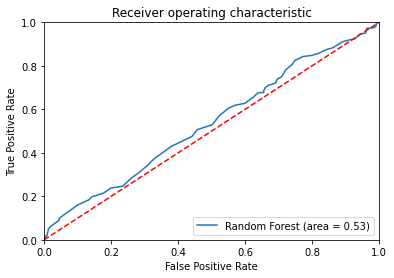

In [20]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

rf_roc_auc = roc_auc_score(y_test[:-19], model.predict(testdf))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test[:-19], model.predict_proba(testdf)[:,1])
plt.figure()

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()